# Corneal OCT quantification 
## For "Haze" detection: librairies and plot functions

In [30]:
from src.image_OCT import *
from src.image_Quantification import *
from matplotlib import pyplot as plt
import numpy as np
from scipy import interpolate
import os
from os import listdir
from os.path import isfile, join
import re
import pandas as pd
import math 
import seaborn as sns
from sklearn import datasets, svm

dirname = os.getcwd()
print(dirname)
savefold=os.path.join(dirname, 'Data\Figure\\') # "C:/Users/csoub/OneDrive/Bureau/3A/Ensta/Super projet/Algo_Maelle/Data/Figure/"
extension=".png"
%matplotlib inline
# plt.figure
# plt.savefig(os.path.join(savefold, 'coucou'+extension))

c:\Users\csoub\OneDrive\Bureau\3A\Ensta\Super projet\Quantification_of_corneal_surgery_antecedent


In [36]:
def plot_treatment(im):
	plt.figure()
	plt.subplot(221)
	plt.title("Input image")
	plt.imshow(im.OCT_brut,cmap="gray")
	plt.axis("off")
	plt.subplot(222)
	plt.title("Arrow removal")
	plt.imshow(im.OCT,cmap="gray")
	plt.axis("off")
	plt.subplot(223)
	plt.title("Exposure correction")
	plt.imshow(im.OCT_cut,cmap="gray")
	plt.axis("off")
	plt.subplot(224)
	plt.title("Flattening")
	plt.imshow(im.OCT_flat,cmap="gray")
	plt.axis("off")
	# plt.show()

def plot_profile(im,im_Q):
	plt.figure()
	res=im_Q.res
	peak=res[0];xmin=res[1];xmax=res[2];xlow1=res[3];xlow2=res[4];extractedProf=res[5]	
	plt.subplot(211)
	plt.imshow(im.OCT_flat.transpose(),cmap="gray",aspect="auto")
	plt.axis("off")
	plt.subplot(212)
	plt.plot(im_Q.intentityProfile)
	plt.xlim([0,im_Q.intentityProfile.shape[0]])
	plt.plot(peak,im_Q.intentityProfile[peak],'+')
	# plt.show()

def plot_quantification(im_Q):
	plt.figure()
	peak=im_Q.res[0];xmin=im_Q.res[1];xmax=im_Q.res[2];xlow1=im_Q.res[3];xlow2=im_Q.res[4];extractedProf=im_Q.res[5];cropedProfile=im_Q.res[6]
	plt.plot([xlow1,xlow2],[im_Q.intentityProfile[xlow1],im_Q.intentityProfile[xlow2]],"r+")
	plt.plot(np.arange(xmin,xmax),cropedProfile)
 	plt.plot(peak,im_Q.intentityProfile[peak],'+')
	plt.legend(["Peaks","Peak width:"+str(xlow2-xlow1)+" px","Intensity profile"])
	plt.xlabel("depth (px)")
	plt.ylabel("intensity (a.u)")
	# plt.show()

def plot_extracted(im,im_Q):
	plt.figure()
	peak=im_Q.res[0];xmin=im_Q.res[1];xmax=im_Q.res[2];xlow1=im_Q.res[3];xlow2=im_Q.res[4];extractedProf=im_Q.res[5];cropedProfile=im_Q.res[6]
	plt.plot(peak,im_Q.intentityProfile[peak],'+')
	plt.plot([xlow1,xlow2],[im_Q.intentityProfile[xlow1],im_Q.intentityProfile[xlow2]],"r+")
	plt.plot(np.arange(xmin,xmax),cropedProfile)
	plt.legend(["Peaks","Peak width:"+str(xlow2-xlow1)+" px","Intensity profile"])
	plt.xlabel("depth (px)")
	plt.ylabel("intensity (a.u)")

def im_plot(im,type='OCT_brut'):
	plt.figure()
	if type=='OCT_brut':
		plt.imshow(im.OCT_brut,cmap="gray",aspect="auto")
	elif type=='OCT':
		plt.imshow(im.OCT_brut,cmap="gray",aspect="auto")
	elif type=='OCT_cut':
		plt.imshow(im.OCT_cut,cmap="gray",aspect="auto")
	elif type=='OCT_flat':
		plt.imshow(im.OCT_flat,cmap="gray",aspect="auto")
	else:
		print("Type not recognize")


TabError: inconsistent use of tabs and spaces in indentation (Temp/ipykernel_19176/1194753165.py, line 39)

## Example of profile extraction and fitting

Line


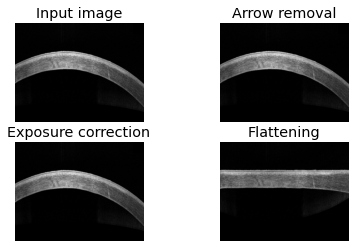

In [34]:
# filepathname=os.path.join(dirname, 'Data','HAZE','haze 1.jpg')
# filepathname=os.path.join(dirname, 'Data','Healthy','23923_BOULIS_OD.jpg')
# filepathname=os.path.join(dirname, 'Data','VILBERT_Maelle','test.jpg')
# filepathname=os.path.join(dirname, 'Data','Healthy_2','NASRAM_OD_Cross.jpg')
filepathname=os.path.join(dirname, 'Data','Fuchs_2','VANLUD_OD_6_Line.jpg')

im=image_OCT(filepathname)
print(im.Path_eye)
im.AutoTreatment()
plot_treatment(im)
moving=False

[ 0.          0.02583052  0.0345602  -0.00822943  0.01270234]


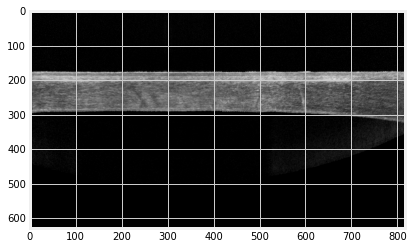

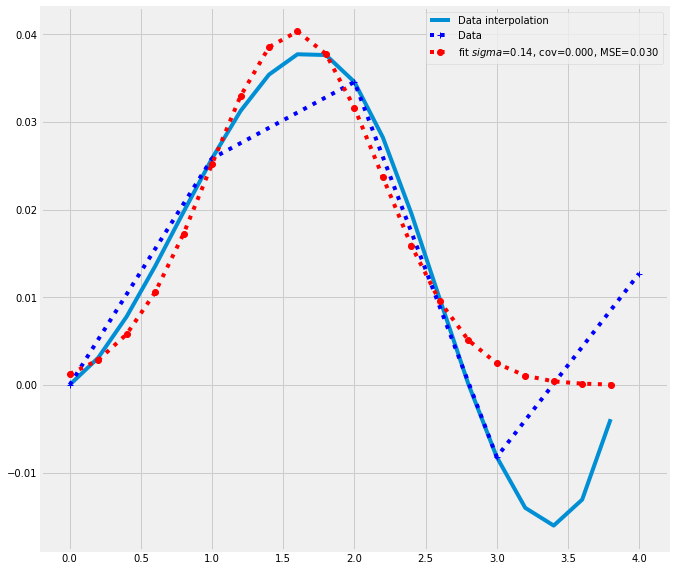

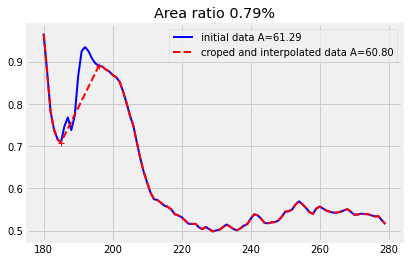

<Figure size 432x288 with 0 Axes>

<Figure size 720x720 with 0 Axes>

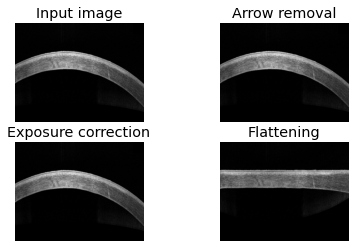

<Figure size 432x288 with 0 Axes>

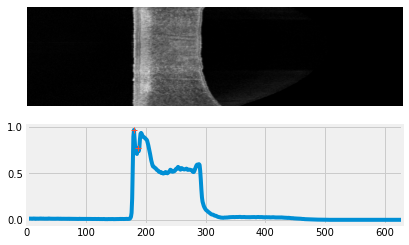

<Figure size 432x288 with 0 Axes>

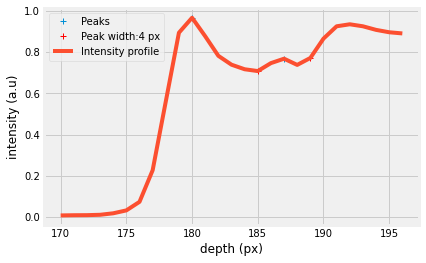

In [35]:
# filepathname=os.path.join(dirname, 'Data','HAZE','haze 1.jpg')
# filepathname=os.path.join(dirname, 'Data','Healthy','23923_BOULIS_OD.jpg')
# filepathname=os.path.join(dirname, 'Data','VILBERT_Maelle','test.jpg')

im=image_OCT(filepathname)
im.AutoTreatment()
im_plot(im,type='OCT_flat')
moving=False
intensity_corr=True

plt.figure(figsize=(10,10))
im_Q=image_Quantification(im,plot=True,moving=moving,intensity_corr=intensity_corr)

if not moving:
	plt.savefig(savefold+"profile"+extension)

	plt.figure(figsize=(10,10))
	plot_treatment(im)
	plt.savefig(savefold+"profile1"+extension)

	plt.figure()
	plot_profile(im,im_Q)
	plt.savefig(savefold+"profile2"+extension)

	plt.figure()
	plot_quantification(im_Q)
	plt.savefig(savefold+"profile3"+extension)
else:
    print(im_Q.parameters)
# plt.imshow(im.OCT_flat)
# filepathname="C:/Users/csoub/OneDrive/Bureau/3A/Ensta/Super projet/Algo_Maelle/Data/HAZE/haze 1.jpg"
# im=image_OCT(filepathname)
# im.AutoTreatment()
# im_Q=image_Quantification(im,plot=True)
# plot_profile(im,im_Q.res)
# plt.imshow(im.OCT_flat)

## Multi-image treatment
### Dataset extraction

In [7]:
moving=False

In [8]:
repertory_haze=os.path.join(dirname, 'Data','HAZE')
repertory_healthy=os.path.join(dirname, 'Data','Healthy')

files_haze = [f for f in listdir(repertory_haze) if isfile(join(repertory_haze, f))]
files_healthy = [f for f in listdir(repertory_healthy) if isfile(join(repertory_healthy, f))]

quantification=[]
i=0
i_list_haze=[]
for haze in files_haze:
	i+=1
	im=image_OCT(os.path.join(repertory_haze, haze))
	try:
		im.AutoTreatment()
		im_Q=image_Quantification(im,plot=False,moving=moving,intensity_corr=intensity_corr)
		parameters=im_Q.parameters
		parameters["Healthy"]=0
		parameters["Origin"]=haze[:-4]
		quantification.append(parameters)
		print(i,":",haze)
		i_list_haze.append(i)
	except:
		print("Error with: "+haze+" image #"+str(i))

i=0
i_list_healthy=[]
for healthy in files_healthy:
	i+=1
	im=image_OCT(os.path.join(repertory_healthy, healthy))
	try:
		im.AutoTreatment()
		im_Q=image_Quantification(im,plot=False,moving=moving,intensity_corr=intensity_corr)
		parameters=im_Q.parameters
		parameters["Healthy"]=1
		parameters["Origin"]=healthy[:-4]
		quantification.append(parameters)
		print(i,":",healthy)
		i_list_healthy.append(i)
	except:
		print("Error with: "+healthy+" image #"+str(i))

n=len(quantification)
data=pd.DataFrame(quantification,index=range(n)) 
data.to_pickle("./Dataset/data_set_learning_small.pkl")

[0.         0.02446123 0.10030111 0.18705897 0.22008036 0.18240761
 0.11499873 0.05712182 0.0136269 ]
1 : haze 1.jpg
[0.         0.02545717 0.11118377 0.20455306 0.24133459 0.19785578
 0.12228612 0.06321919 0.01144385]
2 : haze 2.jpg
[ 0.          0.00192831 -0.00179671]
Error with: haze 3.jpg image #3
[0.         0.02597981 0.0887949  0.15510985 0.17354402 0.14079073
 0.09523952 0.0503919  0.01069712]
4 : haze 4.jpg
[0.         0.00162509 0.04771715 0.11437043 0.14912824 0.16568717
 0.1453593  0.1031345  0.06386952 0.02831679 0.00505778]
5 : haze 5.jpg
Error with: haze 6.jpg image #6
[0.         0.03389862 0.10788735 0.13470399 0.06971155 0.01909932
 0.0062284 ]
1 : 23923_BOULIS_OD.jpg
[0.         0.06986024 0.17532391 0.11941501 0.01970909]
2 : 79296_BESNIC_OD.jpg
[ 0.         -0.02077256  0.07067735  0.17405224  0.12636386  0.03535765
  0.02333442]
3 : 80552_CORANT_OD.jpg
[0.         0.02191896 0.12400892 0.18233777 0.09648074 0.01914183
 0.0175493 ]
4 : 80552_CORANT_OS.jpg
[0.     

### Result of quantification and variables correlation

In [9]:
data


,PeakWidth,Sigma,DataCov,Mean,MSE,AreaRatio,Healthy,Origin
0,1.846296,0.380196,0.005477,0.945920,0.053125,0.025454,0,haze 1
1,1.850995,0.379347,0.006566,0.944897,0.062535,0.027720,0,haze 2
2,1.846296,0.399219,0.003248,0.935186,0.050570,0.017247,0,haze 4
3,2.313744,0.460510,0.003317,1.168061,0.063912,0.025799,0,haze 5
4,1.384722,0.246538,0.002342,0.639839,0.018596,0.014643,1,23923_BOULIS_OD
5,0.923148,0.198192,0.003769,0.509474,0.027947,0.021225,1,79296_BESNIC_OD
6,1.384722,0.207991,0.004476,0.755853,0.073775,0.022506,1,80552_CORANT_OD
7,1.384722,0.224115,0.004386,0.668451,0.029632,0.019277,1,80552_CORANT_OS
8,1.384722,0.227556,0.003016,0.595273,0.034183,0.020157,1,80553_DUMFAU_OD
9,1.384722,0.207308,0.003744,0.599387,0.027732,0.012250,1,80553_DUMFAU_OS


<AxesSubplot:>

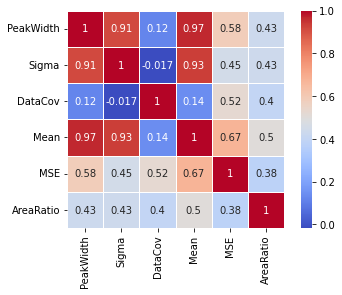

In [10]:
data_copy=data.drop(["Healthy","Origin"],axis=1)
data_copy=(data_copy-np.mean(data_copy,0))/np.std(data_copy,0)
cor=data_copy.corr()
sns.heatmap(cor, square = True, cmap="coolwarm",linewidths=.5,annot=True )

### Plot two by two

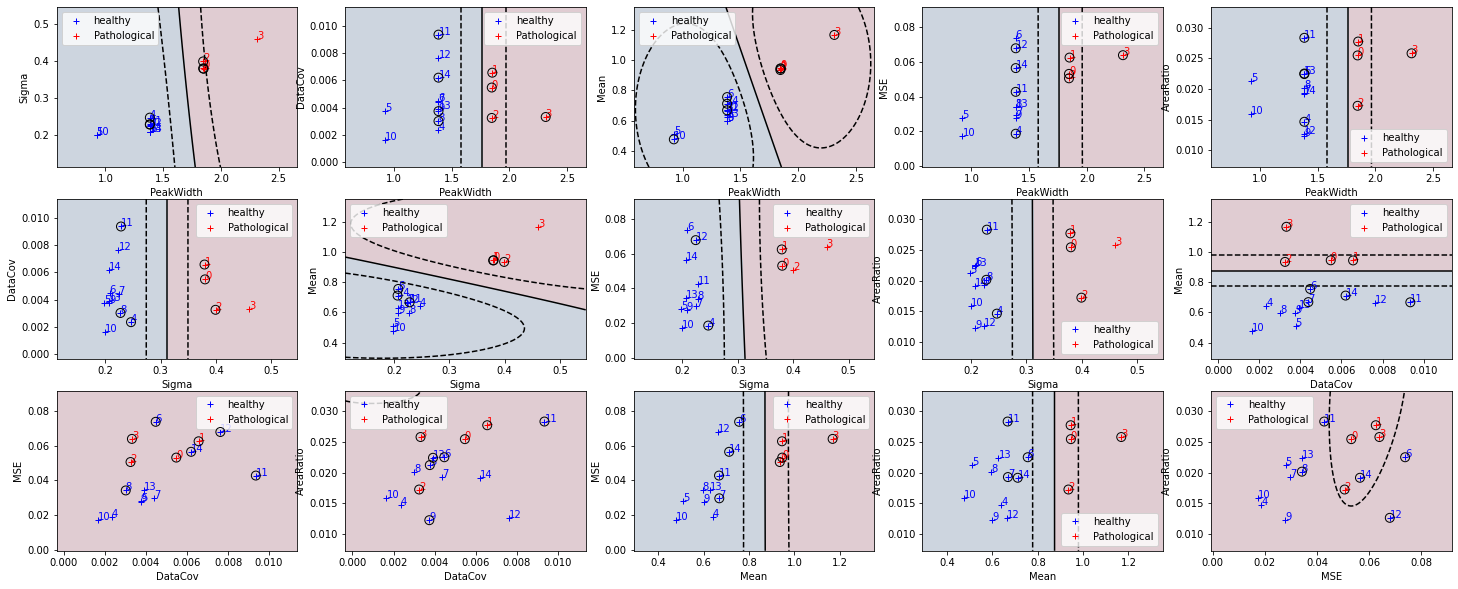

In [11]:
#Plot two by two
import warnings
warnings.filterwarnings("ignore")

variable=data.columns[:-2]
k=len(variable)
comb=math.comb(k,2)
	
plt.figure(figsize=(25,10))
nline=3
ncol=comb//nline+int(comb/nline-comb//nline+0.5)
l=0
for i in range(k-1):
    for j in range(i+1,k):
        l+=1
        plt.subplot(nline,ncol,l)
        x_class1=data[variable[i]][data["Healthy"]==1]
        y_class1=data[variable[j]][data["Healthy"]==1]
        x_class0=data[variable[i]][data["Healthy"]==0]
        y_class0=data[variable[j]][data["Healthy"]==0]
        plt.plot(x_class1.T,y_class1.T,"b+",label="healthy")
        plt.plot(x_class0.T,y_class0.T,"r+",label="Pathological")
        for m in range(len(data)):
            if data["Healthy"][m]==1:
                plt.text(data[variable[i]][m],data[variable[j]][m],str(m),color="blue")
            else:
                plt.text(data[variable[i]][m],data[variable[j]][m],str(m),color="red")
        X=data[variable[i]]
        Y=data[variable[j]]
        Z=np.array([X.to_numpy().T,Y.to_numpy().T]).T
        C=np.array([data["Healthy"].to_numpy()]).T
        clf = svm.SVC()
        clf.fit(Z, C)
        x_min = Z[:, 0].min()-1*np.std(Z[:, 0])
        x_max = Z[:, 0].max()+1*np.std(Z[:, 0])
        y_min = Z[:, 1].min()-1*np.std(Z[:, 1])
        y_max = Z[:, 1].max()+1*np.std(Z[:, 1])
        XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
        Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
        Z = Z.reshape(XX.shape)
        plt.scatter(clf.support_vectors_[:, 0],clf.support_vectors_[:, 1],s=80,facecolors="none",zorder=10,edgecolors="k")
        plt.pcolormesh(XX, YY, Z > 0, cmap="RdBu",alpha=0.2) #plt.cm.Paired
        plt.contour(XX,YY,Z,colors=["k", "k", "k"],linestyles=["--", "-", "--"],levels=[-0.5, 0, 0.5],linewidth=0.1)
        plt.xlabel(variable[i])
        plt.ylabel(variable[j])
        plt.legend()
        

### Exemple of treatment

c:\Users\csoub\OneDrive\Bureau\3A\Ensta\Super projet\Quantification_of_corneal_surgery_antecedent\Data\HAZE\haze 5.jpg
[0.         0.00162509 0.04771715 0.11437043 0.14912824 0.16568717
 0.1453593  0.1031345  0.06386952 0.02831679 0.00505778]


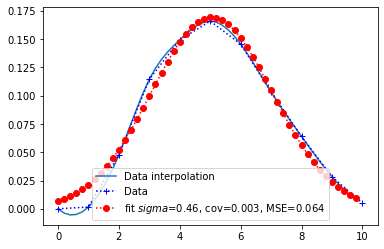

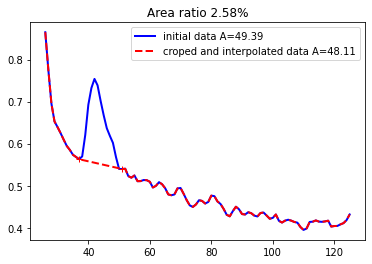

c:\Users\csoub\OneDrive\Bureau\3A\Ensta\Super projet\Quantification_of_corneal_surgery_antecedent\Data\Healthy\80553_DUMFAU_OD.jpg
[0.         0.04095757 0.13393619 0.13931419 0.05486485 0.01342394
 0.01476061]


<Figure size 432x288 with 0 Axes>

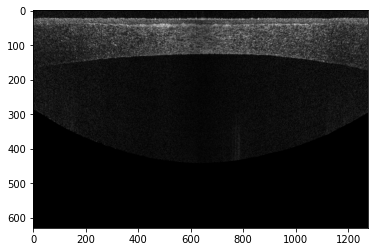

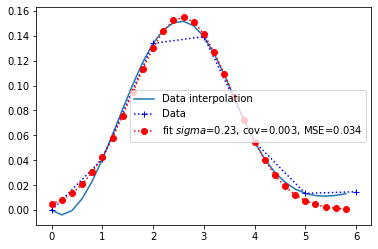

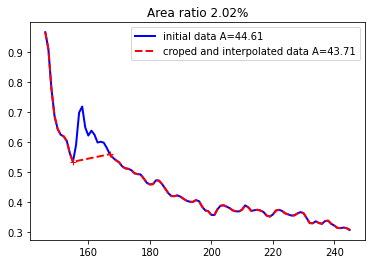

<Figure size 432x288 with 0 Axes>

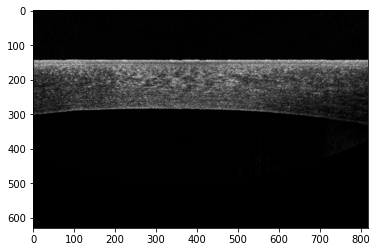

In [12]:
i=4
im=image_OCT(os.path.join(repertory_haze, files_haze[i]))
print(im.Path)
im.AutoTreatment()
im_Q=image_Quantification(im,True,intensity_corr=intensity_corr)
plt.figure();im_plot(im,type='OCT_flat')
# plot_profile(im,im_Q)
# im_plot(im,type='OCT_flat')

plt.figure()
i=4
im=image_OCT(os.path.join(repertory_healthy, files_healthy[i]))
print(im.Path)
im.AutoTreatment()
im_Q=image_Quantification(im,True,intensity_corr=intensity_corr)
plt.figure();im_plot(im,type='OCT_flat')
# plot_profile(im,im_Q)
# im_plot(im,type='OCT_flat')

## SVM classifier
### On PCA axis

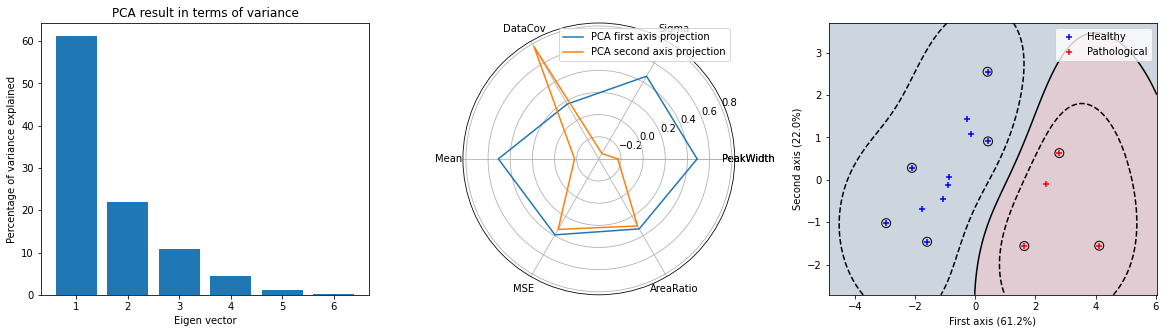

In [13]:
# PCA
import warnings
warnings.filterwarnings("ignore")
from sklearn.decomposition import PCA
from sklearn import svm

data_copy=data.drop(["Healthy","Origin"],axis=1)
data_copy=(data_copy-np.mean(data_copy,0))/np.std(data_copy,0)
N=len(data_copy)
K=len(data_copy.columns)
pca = PCA()
pca.fit(data_copy)


plt.figure(figsize=(20,5))
plt.subplot(131)
plt.bar(np.arange(1,K+1,1),pca.explained_variance_ratio_*100)
plt.xlabel('Eigen vector')
plt.ylabel('Percentage of variance explained')
plt.title("PCA result in terms of variance")
plt.subplot(132,polar=True)
categories = data_copy.columns
categories = [*categories, categories[0]]
axis1= pca.components_[0]
axis1 = [*axis1, axis1[0]]
axis2= pca.components_[1]
axis2 = [*axis2, axis2[0]]
label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(axis1))
plt.plot(label_loc, axis1, label='PCA first axis projection')
plt.plot(label_loc, axis2, label='PCA second axis projection')
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend()

X=np.sum(data_copy*pca.components_[0],axis=1)
Y=np.sum(data_copy*pca.components_[1],axis=1)
Z=np.array([X.to_numpy().T,Y.to_numpy().T]).T
C=np.array([data["Healthy"].to_numpy()]).T
clf = svm.SVC()
clf.fit(Z, C)
x_min = Z[:, 0].min()-1*np.std(Z[:, 0])
x_max = Z[:, 0].max()+1*np.std(Z[:, 0])
y_min = Z[:, 1].min()-1*np.std(Z[:, 1])
y_max = Z[:, 1].max()+1*np.std(Z[:, 1])

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
Z = Z.reshape(XX.shape)

plt.subplot(133)
plt.scatter(X[data["Healthy"]==1],Y[data["Healthy"]==1],c="b",marker="+",label="Healthy",zorder=10)
plt.scatter(X[data["Healthy"]==0],Y[data["Healthy"]==0],c="r",marker="+",label="Pathological",zorder=10)

plt.scatter(clf.support_vectors_[:, 0],clf.support_vectors_[:, 1],s=80,facecolors="none",zorder=10,edgecolors="k")
plt.pcolormesh(XX, YY, Z > 0, cmap="RdBu",alpha=0.2) #plt.cm.Paired
plt.contour(XX,YY,Z,colors=["k", "k", "k"],linestyles=["--", "-", "--"],levels=[-0.5, 0, 0.5],linewidth=1)
plt.xlabel("First axis ({:.1f}%)".format(pca.explained_variance_ratio_[0]*100))
plt.ylabel("Second axis ({:.1f}%)".format(pca.explained_variance_ratio_[1]*100))
plt.legend()

pca = PCA(n_components=2)
data_proj=pca.fit(data_copy,data["Healthy"])

### Leave one out test

In [14]:
#SVM LOO test

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import confusion_matrix
X=np.sum(data_copy*pca.components_[0],axis=1)
Y=np.sum(data_copy*pca.components_[1],axis=1)
Z=np.array([X.to_numpy().T,Y.to_numpy().T]).T
C=np.array([data["Healthy"].to_numpy()]).T

loo = LeaveOneOut()
loo.get_n_splits(Z)
result=[]
result_pred=[]
conf=np.zeros((2,2))
for train_index, test_index in loo.split(X):
	print("TRAIN:", train_index, "TEST:", test_index)
	X_train, X_test = Z[train_index], Z[test_index]
	y_train, y_test = C[train_index], C[test_index]
	clf = svm.SVC()
	clf.fit(X_train, y_train)
	y_predict=clf.predict(X_test)
	result.append(y_test.ravel()[0])
	result_pred.append(y_predict.ravel()[0])
	if y_predict[0]==y_test[0][0] and y_test[0][0]==0:
		conf[0,0]+=1
	elif y_predict[0]!=y_test[0][0] and y_test[0][0]==1:
		print(y_predict,y_test)
		conf[0,1]+=1
	elif y_predict[0]!=y_test[0][0] and y_test[0][0]==0:
		conf[1,0]+=1
	elif y_predict[0]==y_test[0][0] and y_test[0][0]==1:
		conf[1,1]+=1
# print(result_pred)
# print(result)
# print(result_pred==result)
# ytrain=data["Healthy"].to_numpy()
print(conf)

TRAIN: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14] TEST: [0]
TRAIN: [ 0  2  3  4  5  6  7  8  9 10 11 12 13 14] TEST: [1]
TRAIN: [ 0  1  3  4  5  6  7  8  9 10 11 12 13 14] TEST: [2]
TRAIN: [ 0  1  2  4  5  6  7  8  9 10 11 12 13 14] TEST: [3]
TRAIN: [ 0  1  2  3  5  6  7  8  9 10 11 12 13 14] TEST: [4]
TRAIN: [ 0  1  2  3  4  6  7  8  9 10 11 12 13 14] TEST: [5]
TRAIN: [ 0  1  2  3  4  5  7  8  9 10 11 12 13 14] TEST: [6]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 11 12 13 14] TEST: [7]
TRAIN: [ 0  1  2  3  4  5  6  7  9 10 11 12 13 14] TEST: [8]
TRAIN: [ 0  1  2  3  4  5  6  7  8 10 11 12 13 14] TEST: [9]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 11 12 13 14] TEST: [10]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 12 13 14] TEST: [11]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 13 14] TEST: [12]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 14] TEST: [13]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13] TEST: [14]
[[ 4.  0.]
 [ 0. 11.]]


## Random Forest

In [15]:
#RF LOO test
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, random_state = 2020)
data_copy=(data_copy-np.mean(data_copy,0))/np.std(data_copy,0)
rf.fit(data_copy, data["Healthy"])
predictions = rf.predict(data_copy)
# confusion_matrix(predictions, data["Healthy"])
predictions=(predictions+0.5).astype(int)
ytrain=data["Healthy"].to_numpy()

print(confusion_matrix(predictions,ytrain))
print(predictions)
print(ytrain)


[[ 4  0]
 [ 0 11]]
[0 0 0 0 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 1 1 1 1 1 1 1 1 1 1 1]


Text(0.5, 0, 'Relative Importance')

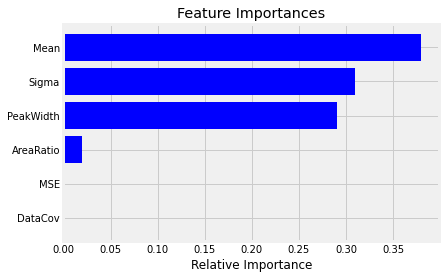

In [16]:
importances = rf.feature_importances_
indices = np.argsort(importances)
# style du graphique 
plt.style.use('fivethirtyeight')
%matplotlib inline
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [data_copy.columns[i] for i in indices])
plt.xlabel('Relative Importance')

## New healthy dataset

In [17]:
repertory_healthy_2=os.path.join(dirname, 'Data','Healthy_2')
healthy_value=1 #healthy

def create_new_dataset(repository,healthy_value):
	files = [f for f in listdir(repository) if isfile(join(repository, f))]
	quantification=[]
	i=0
	i_list=[]
	for f in files:
		if(f[-3:]=="jpg"):
			i+=1
			try:
				im=image_OCT(os.path.join(repository, f))
			except:
				print("Error with: "+f+" image #"+str(i))
			try:
				im.AutoTreatment()
				im_Q=image_Quantification(im,plot=False,moving=moving,intensity_corr=intensity_corr)
				parameters=im_Q.parameters
				parameters["Healthy"]=healthy_value
				parameters["Origin"]=f[:-4]
				quantification.append(parameters)
				# print(i,":",healthy)
				i_list.append(i)
			except:
				print("Error with: "+f+" image #"+str(i))
	n=len(quantification)
	print(n,"/",len(files)," files succesfully quantified")
	data=pd.DataFrame(quantification,index=range(n)) 
	return(data)

data_2=create_new_dataset(repertory_healthy_2,healthy_value)
data_2.to_pickle("./Dataset/data_set_healthy.pkl")

[0.         0.13110832 0.29479744 0.17424658 0.02736246]
[0.         0.07880827 0.18101298 0.13780398 0.03016476]
[ 0.          0.04510178  0.16996365  0.20833224  0.07317351 -0.02385978
  0.01294683]
[ 0.          0.01183692  0.13925424  0.2167438   0.0792074  -0.02379616
  0.01622065]
[ 0.          0.02399051  0.16556842  0.2235062   0.07781162 -0.02931537
  0.02054046]
[ 0.          0.03485465  0.17714331  0.18810189  0.01113292 -0.05885151
  0.02181299]
[0.         0.05039941 0.15652029 0.11063246 0.0118172 ]
[0.         0.06223106 0.15182462 0.08556844 0.00629306]
[0.         0.04864677 0.15264138 0.11467761 0.0112419 ]
[0.         0.04103802 0.13505867 0.10536071 0.00818426]
[ 0.          0.07251565  0.13903401  0.07795053 -0.00017624]
[ 0.          0.07145179  0.09861785  0.04769227 -0.00349612]
[ 0.          0.07248794  0.14075812  0.08581421 -0.00232936]
[0.         0.02248268 0.08418266 0.07723043 0.00486325]
[ 0.          0.03909976  0.13062672  0.1337868   0.03187879 -0.019

In [18]:
data_2

,PeakWidth,Sigma,DataCov,Mean,MSE,AreaRatio,Healthy,Origin
0,0.923148,0.192947,0.010370,0.486650,0.038216,0.023583,1,ARAILI_OS_Line
1,0.923148,0.215471,0.003818,0.521991,0.027520,0.016452,1,ARAILI_OS_Pachy
2,1.384722,0.204899,0.006951,0.609912,0.075543,0.020033,1,BEGABD_OD_Cross
3,1.384722,0.184589,0.007035,0.648135,0.076352,0.018449,1,BEGABD_OD_Pachy
4,1.384722,0.190988,0.007933,0.628456,0.088622,0.020435,1,BEGABD_OS_Cross
...,...,...,...,...,...,...,...,...
137,1.384722,0.222632,0.004758,0.563157,0.064476,0.022139,1,TOUMAT_OS_Cross
138,0.923148,0.202665,0.003875,0.547548,0.035856,0.018839,1,TOUMAT_OS_Pachy
139,0.923148,0.209607,0.002006,0.534759,0.019756,0.012935,1,WIETIP_OD_Line
140,0.923148,0.194756,0.002725,0.414720,0.029858,0.007072,1,WIETIP_OS_Line


Ratio of true positive: 81.69%
Miss classified:26
Missclassify: CHALAN_OS_Line
Missclassify: CORDIA_OS_Line
Missclassify: DENCAM_OD_PachyWide
Missclassify: DORROM_OS_Line
Missclassify: GIRCHA_OD_PachyWide
Missclassify: GIRCHA_OS_PachyWide
Missclassify: HEDIME_OD_PachyWide
Missclassify: KENCAR_OD_Line
Missclassify: KENCAR_OD_Pachy
Missclassify: KENCAR_OS_Line
Missclassify: LAMKEV_OD_Cross
Missclassify: LAMKEV_OD_PachyWide
Missclassify: LAMKEV_OS_PachyWide
Missclassify: LOLDOR_OD_Cross
Missclassify: LOPDEB_OD_Line
Missclassify: LOPDEB_OD_Pachy
Missclassify: LOPDEB_OS_Pachy
Missclassify: MERLAM_OD_Cross
Missclassify: MERLAM_OD_PachyWide
Missclassify: MERLAM_OS_Cross
Missclassify: NASRAM_OS_Cross
Missclassify: PORALE_OS_PachyWide
Missclassify: SLOJUL_OD_Line
Missclassify: SLOJUL_OS_Line
Missclassify: TOUMAT_OD_Cross
Missclassify: WIETIP_OS_Pachy


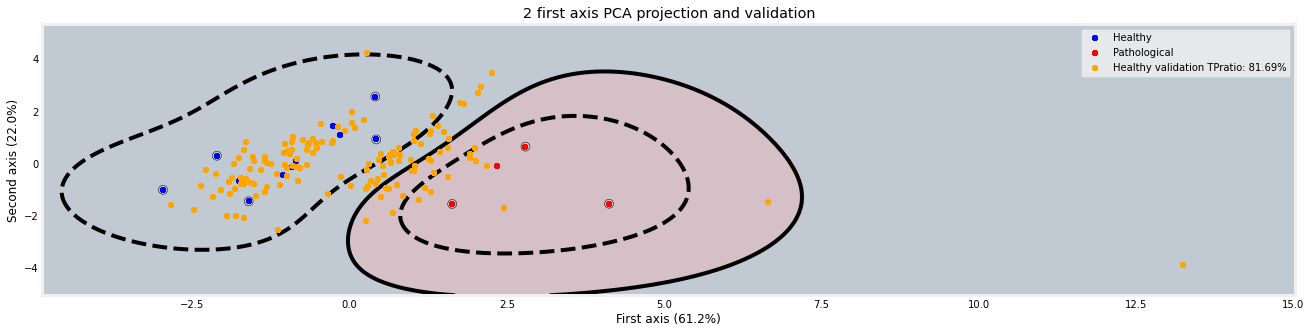

In [19]:
data_copy_2=data_2.drop(["Healthy","Origin"],axis=1)
data_copy_2=(data_copy_2-np.mean(data_copy_2,0))/np.std(data_copy_2,0)

X_2=np.sum(data_copy_2*pca.components_[0],axis=1)
Y_2=np.sum(data_copy_2*pca.components_[1],axis=1)
Z_2=np.array([X_2.to_numpy().T,Y_2.to_numpy().T]).T

class_z=np.ones((len(Z_2),1))
y_predict_2=clf.predict(Z_2)
print("Ratio of true positive: {:.2f}%".format(100*np.sum(y_predict_2)/len(y_predict_2)))
print("Miss classified:"+str(len(y_predict_2)-np.sum(y_predict_2)))
for i,y in enumerate(y_predict_2):
    if y==0:
        print("Missclassify:",data_2["Origin"][i])
        

X=np.sum(data_copy*pca.components_[0],axis=1)
Y=np.sum(data_copy*pca.components_[1],axis=1)
Z=np.array([X.to_numpy().T,Y.to_numpy().T]).T
C=np.array([data["Healthy"].to_numpy()]).T

x_min = np.min([ Z[:, 0].min()-1*np.std(Z[:, 0]), Z_2[:, 0].min()-1*np.std(Z_2[:, 0])])
x_max = np.max([ Z[:, 0].max()+1*np.std(Z[:, 0]), Z_2[:, 0].max()+1*np.std(Z_2[:, 0])])
y_min = np.min([ Z[:, 1].min()-1*np.std(Z[:, 1]), Z_2[:, 1].min()-1*np.std(Z_2[:, 1])])
y_max = np.max([ Z[:, 1].max()+1*np.std(Z[:, 1]), Z_2[:, 1].max()+1*np.std(Z_2[:, 1])])

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
Z = Z.reshape(XX.shape)

plt.figure(figsize=(20,5))
plt.scatter(X[data["Healthy"]==1],Y[data["Healthy"]==1],c="b",marker="+",label="Healthy",zorder=10)
plt.scatter(X[data["Healthy"]==0],Y[data["Healthy"]==0],c="r",marker="+",label="Pathological",zorder=10)
plt.scatter(X_2,Y_2,c="orange",marker="+",label="Healthy validation TPratio: {:.2f}%".format(100*np.sum(y_predict_2)/len(y_predict_2)),zorder=10)

plt.scatter(clf.support_vectors_[:, 0],clf.support_vectors_[:, 1],s=80,facecolors="none",zorder=10,edgecolors="k")
plt.pcolormesh(XX, YY, Z > 0, cmap="RdBu",alpha=0.2) #plt.cm.Paired
plt.contour(XX,YY,Z,colors=["k", "k", "k"],linestyles=["--", "-", "--"],levels=[-0.5, 0, 0.5],linewidth=1)

plt.title("2 first axis PCA projection and validation")
plt.xlabel("First axis ({:.1f}%)".format(pca.explained_variance_ratio_[0]*100))
plt.ylabel("Second axis ({:.1f}%)".format(pca.explained_variance_ratio_[1]*100))
plt.legend()

Ratio of true positive: 99.30%
Miss classified:1
Missclassify: LOPDEB_OS_Pachy


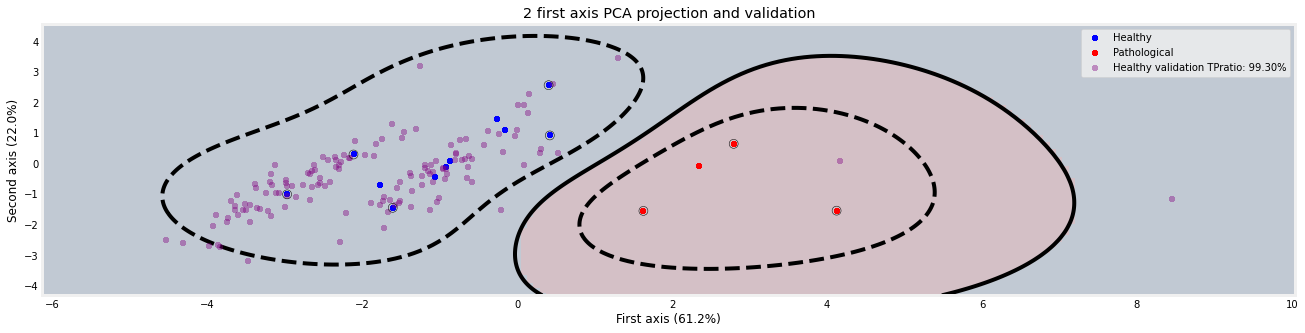

In [20]:
data_copy_2=data_2.drop(["Healthy","Origin"],axis=1)
data_copy_2=(data_copy_2-np.mean(data.drop(["Healthy","Origin"],axis=1),0))/np.std(data.drop(["Healthy","Origin"],axis=1),0)

X_2=np.sum(data_copy_2*pca.components_[0],axis=1)
Y_2=np.sum(data_copy_2*pca.components_[1],axis=1)
Z_2=np.array([X_2.to_numpy().T,Y_2.to_numpy().T]).T

class_z=np.ones((len(Z_2),1))
y_predict_2=clf.predict(Z_2)
print("Ratio of true positive: {:.2f}%".format(100*np.sum(y_predict_2)/len(y_predict_2)))
print("Miss classified:"+str(len(y_predict_2)-np.sum(y_predict_2)))
for i,y in enumerate(y_predict_2):
    if y==0:
        print("Missclassify:",data_2["Origin"][i])
        

X=np.sum(data_copy*pca.components_[0],axis=1)
Y=np.sum(data_copy*pca.components_[1],axis=1)
Z=np.array([X.to_numpy().T,Y.to_numpy().T]).T
C=np.array([data["Healthy"].to_numpy()]).T

x_min = np.min([ Z[:, 0].min()-1*np.std(Z[:, 0]), Z_2[:, 0].min()-1*np.std(Z_2[:, 0])])
x_max = np.max([ Z[:, 0].max()+1*np.std(Z[:, 0]), Z_2[:, 0].max()+1*np.std(Z_2[:, 0])])
y_min = np.min([ Z[:, 1].min()-1*np.std(Z[:, 1]), Z_2[:, 1].min()-1*np.std(Z_2[:, 1])])
y_max = np.max([ Z[:, 1].max()+1*np.std(Z[:, 1]), Z_2[:, 1].max()+1*np.std(Z_2[:, 1])])

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
Z = Z.reshape(XX.shape)

plt.figure(figsize=(20,5))
plt.scatter(X[data["Healthy"]==1],Y[data["Healthy"]==1],c="b",marker="+",label="Healthy",zorder=10)
plt.scatter(X[data["Healthy"]==0],Y[data["Healthy"]==0],c="r",marker="+",label="Pathological",zorder=10)
plt.scatter(X_2,Y_2,c="purple",marker="+",label="Healthy validation TPratio: {:.2f}%".format(100*np.sum(y_predict_2)/len(y_predict_2)),zorder=10,alpha=0.4)

plt.scatter(clf.support_vectors_[:, 0],clf.support_vectors_[:, 1],s=80,facecolors="none",zorder=10,edgecolors="k")
plt.pcolormesh(XX, YY, Z > 0, cmap="RdBu",alpha=0.2) #plt.cm.Paired
plt.contour(XX,YY,Z,colors=["k", "k", "k"],linestyles=["--", "-", "--"],levels=[-0.5, 0, 0.5],linewidth=1)

plt.title("2 first axis PCA projection and validation")
plt.xlabel("First axis ({:.1f}%)".format(pca.explained_variance_ratio_[0]*100))
plt.ylabel("Second axis ({:.1f}%)".format(pca.explained_variance_ratio_[1]*100))
plt.legend()

In [21]:
ind=np.where(X_2>8)[0]
data_2.T[ind]

,111
PeakWidth,2.769444
Sigma,0.688427
DataCov,0.002142
Mean,1.226987
MSE,0.135271
AreaRatio,0.03843
Healthy,1
Origin,NASRAM_OD_Cross


In [22]:
np.mean(data_2,0)

PeakWidth    1.161007
Sigma        0.199852
DataCov      0.002759
Mean         0.570811
MSE          0.041693
AreaRatio    0.014769
Healthy      1.000000
dtype: float64

# Fuchs

In [23]:
repertory_fuchs=os.path.join(dirname, 'Data','Fuchs_2')
# repertory_fuchs=os.path.join(dirname, 'Data','Fuchs_renammed')
healthy_value=2 #fushs

data_fuchs=create_new_dataset(repertory_fuchs,healthy_value)


[ 0.         -0.00551637  0.04517496  0.08633764  0.06351163  0.03483622
  0.02076024]
[0.         0.00171122 0.06068436 0.13774393 0.14261053 0.11461034
 0.11150324 0.08572815 0.01611921]
[0.         0.02869797 0.11616582 0.16520963 0.17047372 0.20943642
 0.21708755 0.17275397 0.13346961 0.10540981 0.0680438  0.03624461
 0.0108614 ]
[0.         0.06683513 0.12519696 0.12682827 0.14804537 0.1766999
 0.15801417 0.09800344 0.06311907 0.04666537 0.01649645]
[0.         0.04843673 0.11361485 0.14587609 0.16634062 0.17338652
 0.14674688 0.09730154 0.05454904 0.02685378 0.00261858]
[ 0.         -0.00126663  0.05434386  0.11613689  0.15334319  0.16982415
  0.17355659  0.13466974  0.09404428  0.06729847  0.04416917  0.02305393
  0.00260374]
[0.         0.0194122  0.08201558 0.11062453 0.12825979 0.15934355
 0.14047949 0.08569247 0.04327458 0.0225661  0.00482432]
[ 0.          0.033971    0.07901807  0.11820312  0.13501207  0.14834489
  0.15196783  0.12418819  0.09233224  0.07924144  0.0532791 

In [24]:
# data_fuchs_detail=pd.read_pickle(os.path.join(repertory_fuchs,"data_renamed.pkl"))
len(data_fuchs)

month=np.ones(len(data_fuchs))*np.nan
for i in range(len(data_fuchs)):
    origin=data_fuchs["Origin"][i]
    origin_split=origin.split("_")
    month[i]=int(origin_split[2])
data_fuchs=data_fuchs.assign(Month=month)
data_fuchs.to_pickle("./Dataset/data_set_fuchs.pkl")

In [25]:
# data_fuchs_detailed=data_fuchs.copy()
# data_fuchs_detailed.insert(len(data_fuchs_detailed.T),"month",0)
# data_fuchs_detailed.insert(len(data_fuchs_detailed.T),"type","")
# for i in range(len(data_fuchs_detailed)):
#     index=np.where(data_fuchs_detail==data_fuchs["Origin"][i])[0]
#     data_fuchs_detailed["month"][i]=data_fuchs_detail["Month"][index]
#     data_fuchs_detailed["type"][i]=data_fuchs_detail["type"][index]

In [26]:
data_fuchs.head()

,PeakWidth,Sigma,DataCov,Mean,MSE,AreaRatio,Healthy,Origin,Month
0,1.384722,0.258755,0.000937,0.773321,0.050214,0.019196,2,BARVER_OD_0_Line,0.0
1,1.846296,0.458977,0.002127,1.048359,0.119122,0.020066,2,BARVER_OD_0_Pachy,0.0
2,2.769444,0.640778,0.004447,1.272999,0.127240,0.035296,2,BARVER_OD_12_Line,12.0
3,2.307870,0.590739,0.002377,1.063431,0.100026,0.028965,2,BARVER_OD_12_Pachy,12.0
4,2.307870,0.522643,0.003247,1.038623,0.061781,0.021845,2,BARVER_OD_1_Line,1.0


In [27]:
list_parameters=["PeakWidth","Sigma","DataCov","Mean","MSE","AreaRatio","Healthy","Origin"]
total_data=[data_2[list_parameters],data_fuchs[list_parameters+["Month"]]]
total_data=pd.concat(total_data)
print(len(total_data))

424


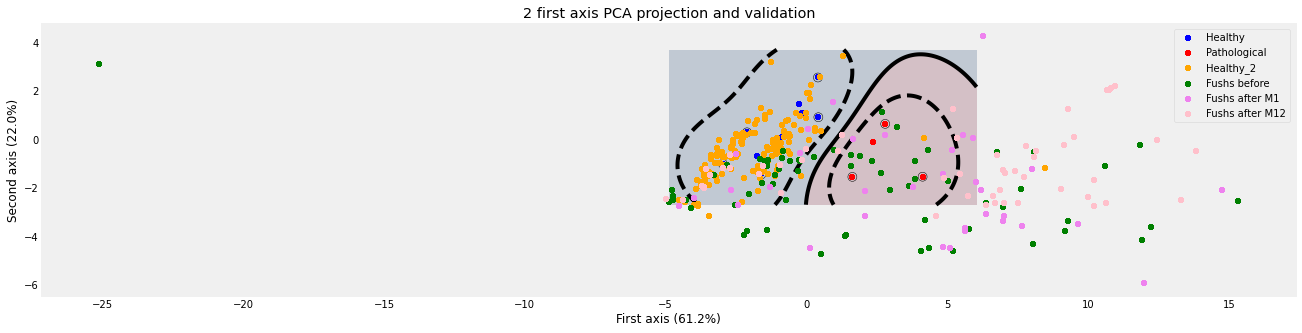

In [28]:
plt.figure(figsize=(20,5))
#Learning data
data_copy=data.drop(["Healthy","Origin"],axis=1)
data_copy=(data_copy-np.mean(data_copy,0))/np.std(data_copy,0)

## Data extraction and projection
X=np.sum(data_copy*pca.components_[0],axis=1)
Y=np.sum(data_copy*pca.components_[1],axis=1)
Z=np.array([X.to_numpy().T,Y.to_numpy().T]).T
C=np.array([data["Healthy"].to_numpy()]).T
## Prediction
class_z=np.ones((len(Z),1))
y_predict=clf.predict(Z)

# Other data

total_data_copy=total_data[list_parameters[:-2]]
total_data_copy=(total_data_copy-np.mean(data.drop(["Healthy","Origin"],axis=1),0))/np.std(data.drop(["Healthy","Origin"],axis=1),0)

## Data extraction and projection
X_other=np.sum(total_data_copy*pca.components_[0],axis=1)
Y_other=np.sum(total_data_copy*pca.components_[1],axis=1)
Z_other=np.array([X.to_numpy().T,Y.to_numpy().T]).T
C_other=np.array([data["Healthy"].to_numpy()]).T
## Prediction
class_z_other=np.ones((len(Z_other),1))
y_predict_other=clf.predict(Z_other)


## SVM Plot
x_min = Z[:, 0].min()-1*np.std(Z[:, 0])
x_max = Z[:, 0].max()+1*np.std(Z[:, 0])
y_min = Z[:, 1].min()-1*np.std(Z[:, 1])
y_max = Z[:, 1].max()+1*np.std(Z[:, 1])
XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
ZZ = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
ZZ = ZZ.reshape(XX.shape)

plt.scatter(clf.support_vectors_[:, 0],clf.support_vectors_[:, 1],s=80,facecolors="none",zorder=10,edgecolors="k")
plt.pcolormesh(XX, YY, ZZ > 0, cmap="RdBu",alpha=0.2) #plt.cm.Paired
plt.contour(XX,YY,ZZ,colors=["k", "k", "k"],linestyles=["--", "-", "--"],levels=[-0.5, 0, 0.5],linewidth=1)


## Data plot
### Learning dataset
plt.scatter(X[data["Healthy"]==1],Y[data["Healthy"]==1],c="b",marker="+",label="Healthy",zorder=10)
plt.scatter(X[data["Healthy"]==0],Y[data["Healthy"]==0],c="r",marker="+",label="Pathological",zorder=10)
# plt.scatter(X,Y,c="orange",marker="+",label="Healthy validation TPratio: {:.2f}%".format(100*np.sum(y_predict_2)/len(y_predict_2)),zorder=10)
bool_pre_op=(total_data["Month"]==0)*(total_data["Healthy"]==2)
bool_post_op_M1=(total_data["Month"]==1)*(total_data["Healthy"]==2)
bool_post_op_M3=(total_data["Month"]==3)*(total_data["Healthy"]==2)
bool_post_op_M6=(total_data["Month"]==6)*(total_data["Healthy"]==2)
bool_post_op_M12=(total_data["Month"]==12)*(total_data["Healthy"]==2)
plt.scatter(X_other[total_data["Healthy"]==1],Y_other[total_data["Healthy"]==1],c="orange",marker="+",label="Healthy_2",zorder=10)
plt.scatter(X_other[bool_pre_op],Y_other[bool_pre_op],c="green",marker="+",label="Fushs before",zorder=10)
plt.scatter(X_other[bool_post_op_M1],Y_other[bool_post_op_M1],c="violet",marker="+",label="Fushs after M1",zorder=10)
plt.scatter(X_other[bool_post_op_M12],Y_other[bool_post_op_M12],c="pink",marker="+",label="Fushs after M12",zorder=10)

plt.title("2 first axis PCA projection and validation")
plt.xlabel("First axis ({:.1f}%)".format(pca.explained_variance_ratio_[0]*100))
plt.ylabel("Second axis ({:.1f}%)".format(pca.explained_variance_ratio_[1]*100))
plt.legend()

In [29]:
#X_other[
B=total_data["month"]==0
C=total_data["Healthy"]==2
print(sum(B))
print(sum(C))
sum(B*C)

KeyError: 'month'